In [26]:
# Dieu
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_profiling import ProfileReport
#Sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os


In [13]:
df = pd.read_csv('../data/cardio_train.csv', sep=';', index_col=0)
df['age'] = np.floor(df['age'] / 365.25)
df.head()
Y = df['cardio']
X = df.loc[:, df.columns != 'cardio']

In [6]:
# prof = ProfileReport(df)
# prof.to_file(output_file='rapport.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 235.15it/s]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=2019)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.37950663831244774
Mean Squared Error: 0.215069321685971
Root Mean Squared Error: 0.46375567024670544


In [ ]:
X = [[52*365]]

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.7089047619047619


Feature ranking:
1 weight 0.23119722217105107
2 height 0.20711768525239013
3 ap_hi 0.17727571651996651
4 age 0.166804333478455
5 ap_lo 0.10132059550657402
6 cholesterol 0.043423680776322554
7 gluc 0.019983733620097813
8 gender 0.019269823094231472
9 active 0.014980678342149847
10 smoke 0.010185351607115317
11 alco 0.008441179631646208


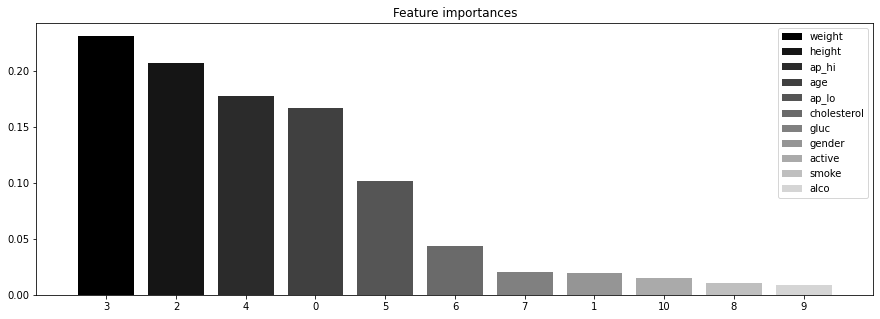

In [9]:
features = dict(zip(range(len(df.columns)-1), df.columns[:-1]))

# Важность признаков
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = max(10, len(df.columns[:-1]))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices]);

In [10]:
matrice_corr = df.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.0,-0.0205,-0.0834,0.063,0.22,0.158,0.142,0.0919,-0.0472,-0.0298,-0.0101,0.235
gender,-0.0205,1.0,0.534,0.172,0.0632,0.0664,-0.0357,-0.0189,0.338,0.171,0.00587,0.00811
height,-0.0834,0.534,1.0,0.314,0.0194,0.0305,-0.0589,-0.0244,0.198,0.0967,-0.00737,-0.0124
weight,0.063,0.172,0.314,1.0,0.278,0.254,0.138,0.11,0.0717,0.0681,-0.0149,0.183
ap_hi,0.22,0.0632,0.0194,0.278,1.0,0.735,0.209,0.105,0.0289,0.0332,-0.00127,0.452
ap_lo,0.158,0.0664,0.0305,0.254,0.735,1.0,0.167,0.0825,0.0262,0.0389,0.0034,0.363
cholesterol,0.142,-0.0357,-0.0589,0.138,0.209,0.167,1.0,0.408,0.0152,0.0413,0.00757,0.215
gluc,0.0919,-0.0189,-0.0244,0.11,0.105,0.0825,0.408,1.0,0.000468,0.0186,-0.00861,0.0915
smoke,-0.0472,0.338,0.198,0.0717,0.0289,0.0262,0.0152,0.000468,1.0,0.34,0.0259,-0.0155
alco,-0.0298,0.171,0.0967,0.0681,0.0332,0.0389,0.0413,0.0186,0.34,1.0,0.0255,-0.00733
